In [20]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

Recursive Knapsack algorithm and problem generator: parts 1, 2, and 3

In [4]:
## recursive knapsack algorithm
def ks(n, m, size = []):
  if n == 0:
    return True
  if m == 0:
    return False
  if n < 0:
    return False
  return (ks(n-size[m], m-1, size) or ks(n, m-1, size))

# test recursive algorithm
def test_ks():
  print("Testing recursive knapsack algorithm (T,F,T)")
  n = 10
  m = 5
  size = [None,1,2,6,4,3]
  print("\tTest 1: ", ks(n,m,size))
  n = 10
  m = 5
  size = [None,5,7,6,9,8]
  print("\tTest 2: ", ks(n,m,size))
  n = 20
  m = 8
  size = [None,13,2,6,9,8,15,5,10]
  print("\tTest 3: ", ks(n,m,size), "\n")

test_ks()

# simple problem generator that returns a size[] list 
def problem_generator(m, aveSize):
  sizeArray = [None]
  for i in range(1, m+1):
    sizeArray.append(random.randint(1, 2*aveSize))
  return sizeArray

# print(problem_generator(10, 10))

Testing recursive knapsack algorithm (T,F,T)
	Test 1:  True
	Test 2:  False
	Test 3:  True 



Memoizing Function: part 4

In [71]:
def init_cache():
  global Cache
  Cache = {}

def memo_wrapper(n, m, size = []):
  init_cache()
  return ks_memo(n, m, size)

# implements the knapsack problem using memoizing
def ks_memo(n, m, size = []):
  if n == 0:
    return True
  if m == 0:
    return False
  if n < 0:
    return False
  if (n,m) in Cache:
    return Cache[(n,m)]
  Cache[(n,m)] = (ks_memo(n-size[m], m-1, size) or ks_memo(n, m-1, size))
  return Cache[(n,m)]

Dynamic Programming Algorithm: part 5

In [99]:
def ks_DP(n,m,size=[]):
  #initialize cache
  cache = {}
  #fill in base cases
  for j in range(m+1):
    cache[(0,j)] = True
  for i in range(1,n+1):
    cache[(i,0)] = False
  #iterate through solutions
  for i in range(1,n+1):
    for j in range(1,m+1):
      #catches if n < 0: return False base case
      if i-size[j] < 0:
        cache[(i,j)] = cache[(i,j-1)]
      else:
        cache[(i,j)] = (cache[(i-size[j],j-1)] or cache[(i,j-1)])
  return cache[(n,m)]

Test if Memoizing and DP give back the same results: part 6

In [ ]:
def test_memo_dp():
  for i in range(100):
    size = problem_generator(5, 11)
    memoResult = memo_wrapper(20,5,size)
    DPResult = ks_DP(20,5,size)
    print(i, " Memoizing: ", memoResult, "\tDynamic Programming: ", DPResult, "\tResult: ", "Pass!" if memoResult == DPResult else "Fail.")
test_memo_dp()

Experiment + Graph: part 7

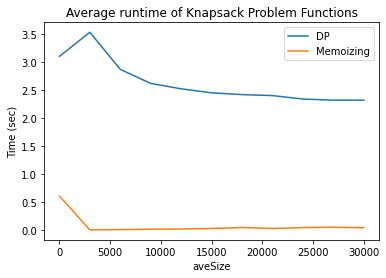

In [102]:
def time_functions():
  n = 5000
  m = 800
  DP_plot = []
  memo_plot = []
  aveSizes = [1, 3000, 6000, 9000, 12000, 15000, 18000,  21000, 24000, 27000, 30000]
  for aveSize in aveSizes:
    DP_times = []
    memo_times = []
    for i in range(20):
      size = problem_generator(800, aveSize)
      DP_start = time.time()
      ks_DP(n,m,size)
      DP_elapsed = (time.time() - DP_start)
      DP_times.append(DP_elapsed)
      memo_start = time.time()
      memo_wrapper(n,m,size)
      memo_elapsed = (time.time() - memo_start)
      memo_times.append(memo_elapsed)
    DP_avg = sum(DP_times) / len(DP_times)
    DP_plot.append(DP_avg)
    memo_avg = sum(memo_times) / len(memo_times)
    memo_plot.append(memo_avg)

  plt.plot(aveSizes, DP_plot, label='DP')
  plt.plot(aveSizes, memo_plot, label='Memoizing')
  plt.title('Average runtime of Knapsack Problem Functions')
  plt.xlabel('aveSize')
  plt.ylabel('Time (sec)')
  plt.legend()
  plt.show()

time_functions()

In the tests, memoization performs better than dynamic programming. Memoization works from the top-down while dynamic programming works from the bottom-up. As a result, the dynamic programming algorithm iterates through every possible subproblem and solution but the memoizing algorithm outputs 'True' as soon as a solution is found. 



Example graph: 


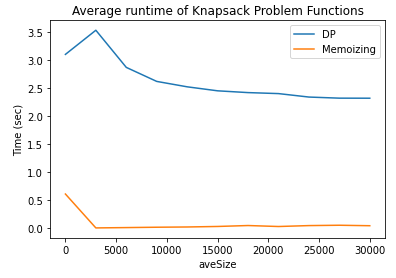

